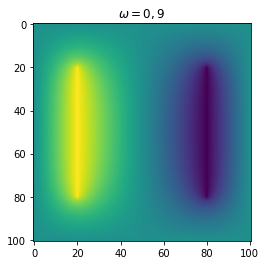

Wall time: 7.96 s


In [1]:
%%time
import numpy as np
import matplotlib.pyplot as plt

L = 1.0  #m <----------- inútil
a = 0.01 #m
V = 1.0  #V
M = 100  # nº de pontos
alvo = 10**-6
omega = 0.9

# Create arrays to hold potential values
phi = np.zeros([ M+1, M+1 ], float)
phi[20:81 , 20] = V
phi[20:81 , 80] = -V
phiVelho = np.zeros([ M+1, M+1 ], float) # phiVelho tem mesmos valores que phi
phiVelho[20:81 , 20] = V
phiVelho[20:81 , 80] = -V   

# Main loop
delta = 1.0
while delta > alvo:
    
    for i in range(M+1):
        for j in range(M+1):
            if not(i==0 or i==M or j==0 or j==M) and not(20<=i<=80 and (j==20 or j==80)): #se (NÃO tivermos nas fronteiras NEM nas placas)
                phiVelho[i,j] = phi[i,j]
                phi[i,j] = (1 + omega) * (phi[i+1, j] + phi[i-1, j] + \
                            phi[i, j+1] + phi[i, j-1]) / 4 - omega*phi[i,j]

    delta = np.max(abs(phi-phiVelho))

plt.imshow(phi)
plt.title("$\omega = 0,9$")
# plt.gray()
plt.show()